# Machine Learning Models for Prediction of CO2 Emission with Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy.random as nr #for random seed
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection as fs
from sklearn import model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
import warnings 
warnings.filterwarnings('ignore')
import random
#for maintaining randomness
random_state = 1


In [2]:
# define file name
file_name = "Dataset.csv"

# read file from csv to pandas DataFrame
df = pd.read_csv(file_name)


In [3]:
df

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,1.365100e+01
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961000e+00
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935000e+00
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617000e+00
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246000e+00
...,...,...,...,...,...,...,...,...,...,...,...
6586,Zimbabwe,2016,10.738,6.959,0.639,3.139,3.139,11.92,14030338.0,2.096179e+10,4.750000e+01
6587,Zimbabwe,2017,9.582,5.665,0.678,3.239,3.239,14236599.00,14236599.0,2.194784e+10,2.194784e+10
6588,Zimbabwe,2018,11.854,7.101,0.697,4.056,4.056,14438812.00,14438812.0,2.271535e+10,2.271535e+10
6589,Zimbabwe,2019,10.949,6.020,0.697,4.232,4.232,14645473.00,14645473.0,1.464547e+07,1.464547e+07


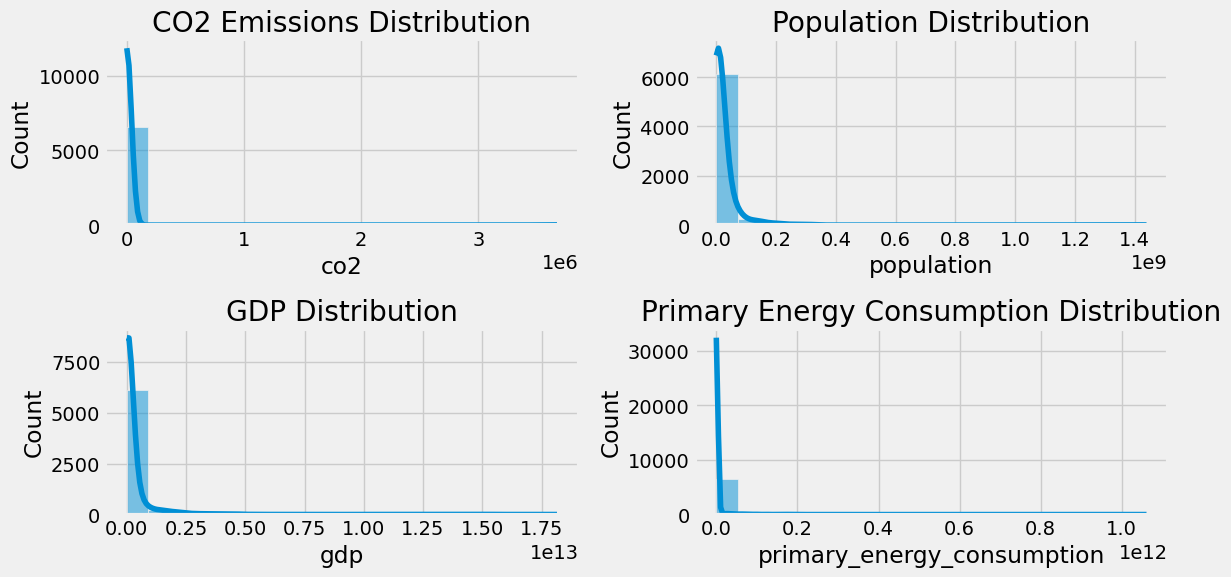

In [4]:
# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='co2', bins=20, kde=True)
plt.title('CO2 Emissions Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='population', bins=20, kde=True)
plt.title('Population Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='gdp', bins=20, kde=True)
plt.title('GDP Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='primary_energy_consumption', bins=20, kde=True)
plt.title('Primary Energy Consumption Distribution')

plt.tight_layout()
plt.show()


In [8]:
# Correlation Matrix Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'Afghanistan'

In [ ]:
# Bar Plot: Top Countries by CO2 Emissions
top_countries = df.groupby('country')['co2'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top Countries by Total CO2 Emissions')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### **3. Handling outlier from previous analysis**

In [ ]:
#Select relevant features from previous analysis
final_data = df[['country','year','co2','coal_co2','cement_co2','gas_co2','oil_co2','methane','population','gdp']]

In [ ]:
#Remove Outliers (countries) with significantly  high range features
final_data = final_data[final_data['country'].isin(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Egypt', 'Estonia', 'Finland', 'France', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Hungary', 'Iceland', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Moldova', 'Morocco', 'Mozambique',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Rwanda', 'Senegal', 'Serbia', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria',
       'Tajikistan', 'Tanzania', 'Thailand', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen'])]

### **4. Data Overview**

In [ ]:
final_data.shape

In [ ]:
print('Columns and thier data types')
final_data.dtypes

In [ ]:
print('Data preview')
final_data.head()

In [ ]:
print('data statistics:')
final_data.describe()

In [ ]:
print('A pairplot of selected features before dimention reduction')
sns.pairplot(final_data[['co2', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'methane', 'population', 'gdp']],
             diag_kind="kde")

### **5. Dimentionality Reduction and multicollinearity solutions**
- Since coal, oil, gas and cement co2 are multicolinear, we will add them up and make use of only the resultant added value.
- More so, we will get the gdp per capita by dividing the gdp by the population.
This is to ensure that there is no multicolinearity in our features and also that the dimensions too are thus reduced.

In [ ]:
#dimensionality reduction
final_data['ccgo'] = final_data['cement_co2'] + final_data['gas_co2'] + final_data['oil_co2'] + final_data['coal_co2']
final_data['gdp_per_capita'] = final_data['gdp'] / final_data['population']
final_data.head()

In [ ]:
data = final_data.drop(['cement_co2','gas_co2','oil_co2','coal_co2','gdp','population'],axis=1)
data.head()

In [ ]:
data.year.unique()

Multicollinearity is a statistical phenomenon that occurs when two or more predictor variables in a regression model are highly correlated with each other. In other words, multicollinearity exists when there is a strong linear relationship between two or more independent variables. This can pose challenges and complications in statistical analysis, particularly in regression analysis, and it can impact the interpretation and reliability of the results.

#### **5.1 Cross checking multicolinearity with Variance inflator factor**

In [ ]:
# rechecking the Variance infllator factor for multicolinearity
X = data.drop(['co2','country'], axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
print('\nThis indicates the absence of multicolinearity in our dataset')


***
#### **6. Splitting the dataset into training and test data**

In [ ]:
ft_cols = ['year','methane','ccgo','gdp_per_capita']
lb_col = ['co2']

features = np.array(data[ft_cols])
label = np.array(data[lb_col]).ravel()

#Data splitting using sklearn train_test_split function
ft_train,ft_test,lb_train,lb_test = ms.train_test_split(features,label,test_size=0.3
                                                     ,shuffle = True, random_state= random_state)

scaler = StandardScaler()
scaler.fit(ft_train)

ft_train_s = scaler.fit_transform(ft_train)
ft_test_s = scaler.transform(ft_test)

# Using KNN

In [ ]:
nr.seed(5)

KNR = KNeighborsRegressor()

k_parameters = {'n_neighbors': np.arange(1,40,1)}
KNR_cv_model = ms.GridSearchCV(KNR, k_parameters, cv = 5)

#Fitting the KNR model to the dataset
KNR_cv_model.fit(ft_train_s, lb_train)

#Best parameters
KNR_cv_model.best_params_

In [ ]:
# Tuned model
KNR_tuned = KNR_cv_model.best_estimator_
# plot predicted vs actual values
predictions = KNR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [Mt] - predicted")
plt.ylabel("CO2 emissions [Mt] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions = KNR_tuned.predict(ft_test_s)
print('Tuned KNeighborsRegressor')

KNN_MAE = mean_absolute_error(test, predictions)
print('MAE : {}'.format(KNN_MAE))
KNN_MSE = mean_squared_error(test, predictions)
print('MSE : {}'.format(KNN_MSE))
KNN_RMSE = sqrt(KNN_MSE)
print('RMSE : %f' % KNN_RMSE)
KNN_R2_score = r2_score(test, predictions)
print('R2_score : {}'.format(KNN_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions


#### **7.2 Using Random Forest**

In [ ]:
RFR = RandomForestRegressor(random_state = 42)
#RFR_params = {'max_depth': list(range(1,10)),'max_features': [3],'n_estimators' : [10,20,30,40]}
# Getting the best parameter using Grid Search
#RFR_model = ms.GridSearchCV(RFR,RFR_params,cv = 5, n_jobs = -1,verbose = 2)
RFR.fit(ft_train_s, lb_train)
#Best parameters
#RFR_model.best_params_ 

In [ ]:
#RFR_tuned = RFR_model.best_estimator_
# plot predicted vs actual values
predictions1 = RFR.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions1, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions1,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions1 = RFR.predict(ft_test_s)
print('Tuned Random Forest')

RF_MAE = mean_absolute_error(test, predictions1)
print('MAE : {}'.format(RF_MAE))
RF_MSE = mean_squared_error(test, predictions1)
print('MSE : {}'.format(RF_MSE))
RF_RMSE = sqrt(RF_MSE)
print('RMSE : %f' % RF_RMSE)
RF_R2_score = r2_score(test, predictions1)
print('R2_score : {}'.format(RF_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions1

In [ ]:
#Summary of model scores from different metrics
KNN_model = KNN_MAE,KNN_MSE,KNN_RMSE,KNN_R2_score
RF_model = RF_MAE,RF_MSE,RF_RMSE,RF_R2_score
summary = pd.DataFrame([KNN_model,RF_model],
                       index = ['KNN','RF'], 
                       columns = ['MAE','MSE','RMSE','R2_score'])
summary

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(width = summary['MAE'], y = summary.index)
plt.xlabel("Mean Absolute Error [MT]")
plt.ylabel("Models")
plt.title("Mean absolute error of models [MT]")

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(width = summary['MSE'], y = summary.index)
plt.xlabel("Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Mean Squared Error of models [MT]")

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(width = summary['RMSE'], y = summary.index)
plt.xlabel("Root Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Root Mean Squared Error of models [MT]")

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(width = summary['R2_score'], y = summary.index)
plt.xlabel("R2 Score of models")
plt.ylabel("Models")
plt.title("Accuracy of models")

In [ ]:
# Plot the actual prices using a black line
plt.plot(lb_test[0:20,] , color='Red')# label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(predictions1[0:20,], color='green')#, label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title("share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel("share price")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()